## Challenge
Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [1]:
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
#list(raw_data.columns)

In [4]:
raw_data.sample(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
15027,Beurre Blanc,5.000,99.0,0.0,9.0,151.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8370,"Potato, Parmesan, and Anchovy Focaccia",4.375,311.0,8.0,8.0,912.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,The New York Sour,5.000,286.0,6.0,1.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7045,Golden Raisin and Apple Lattice Pie,4.375,521.0,5.0,23.0,229.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8711,Linguine with Tomato-Basil Clam Sauce,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

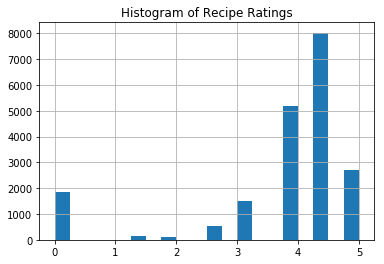

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [13]:
# Transform rating into categorical variable
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 0.0, raw_data['rating'] < 1.0 ), 0, raw_data['rating'])
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 1.0, raw_data['rating'] < 2.0 ), 1, raw_data['rating'])
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 2.0, raw_data['rating'] < 3.0 ), 2, raw_data['rating'])
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 3.0, raw_data['rating'] < 4.0 ), 3, raw_data['rating'])
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 4.0, raw_data['rating'] < 5.0 ), 4, raw_data['rating'])
raw_data['rating'] = np.where(np.logical_and(raw_data['rating'] >= 5.0, raw_data['rating'] < 6.0 ), 5, raw_data['rating'])
raw_data['rating'].head(5)

0    2.0
1    4.0
2    3.0
3    5.0
4    3.0
Name: rating, dtype: float64

In [14]:
from sklearn.svm import SVC
svc = SVC()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating

In [15]:
cross_val_score(svc, X, Y, cv=5)

array([0.41091453, 0.41550349, 0.41909748, 0.41431778, 0.41527327])

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.